# MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
from keras.datasets import mnist
import tensorflow as tf

Using TensorFlow backend.


In [63]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [4]:
print('Shape of training input =',trainX.shape)
print('Shape of training output =',trainy.shape)
print('Shape of testing input =',testX.shape)
print('Shape of testing output =',testy.shape)

Shape of training input = (60000, 28, 28)
Shape of training output = (60000,)
Shape of testing input = (10000, 28, 28)
Shape of testing output = (10000,)


### Visualizing some random images

Text(0.5, 0.94, 'Picking up random images from MNIST')

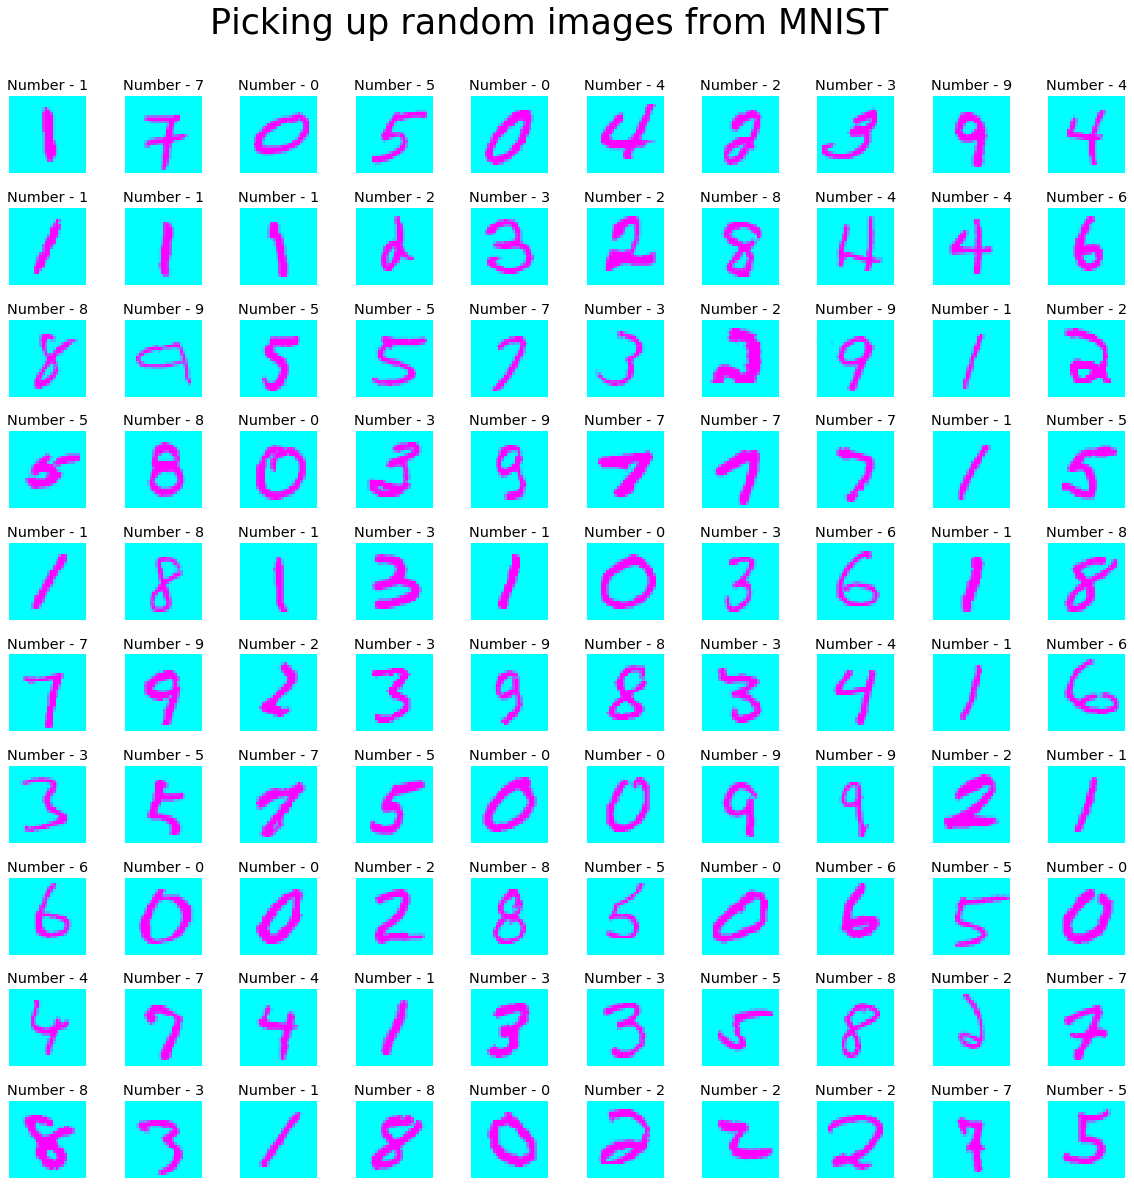

In [43]:
fig, axis = plt.subplots(nrows = 10,ncols = 10, figsize = (20,20),gridspec_kw={'hspace': 0.35, 'wspace': 0.5})

for i in range(0,10):
    for j in range(0,10):
        num = np.random.randint(0,60000)
        axis[i,j].imshow(trainX[num],cmap = 'cool')
        axis[i,j].set_title('Number - ' + str(trainy[num]))
        axis[i,j].axis('off')
plt.suptitle('Picking up random images from MNIST',x=0.5, y =0.94 ,size=35)

### Creating Model

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trainX,trainy, test_size=0.2, random_state=0)

In [66]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train/255.0
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_val = X_val/255.0
test_images = testX.reshape(testX.shape[0],28,28,1)
test_images = test_images/255.0

In [56]:
class FinalCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.998):
            print('\nReached above accuracy of 0.998 so training is stopped')
            self.model.stop_training=True
callbacks = FinalCallback()

In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [59]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 35, callbacks = [callbacks],validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/35
48000/48000 [==============================] - 54s 1ms/sample - loss: 0.1787 - accuracy: 0.9450 - val_loss: 0.0473 - val_accuracy: 0.9852
Epoch 2/35
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.0604 - accuracy: 0.9817 - val_loss: 0.0360 - val_accuracy: 0.9878
Epoch 3/35
48000/48000 [==============================] - 51s 1ms/sample - loss: 0.0451 - accuracy: 0.9862 - val_loss: 0.0323 - val_accuracy: 0.9898
Epoch 4/35
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0286 - val_accuracy: 0.9912
Epoch 5/35
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0312 - val_accuracy: 0.9901
Epoch 6/35
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0419 - val_accuracy: 0.9883
Epoch 7/35
48000/48000 [==============================] 

 We Got
     Training accuracy = **99.83%** and 
     Validation accuracy = **99.23%**

In [67]:
test_loss, test_acc = model.evaluate(test_images, testy)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [68]:
print('The Accurracy in the test set is = ' + str(test_acc))

The Accurracy in the test set is = 0.9922


### Visualizing your results

In [69]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']   
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = model.history.epoch

Text(0, 0.5, 'Accuracy')

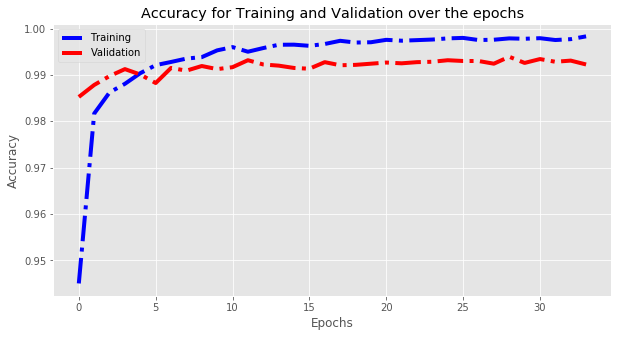

In [70]:
plt.figure(figsize=(10,5),frameon=False)
plt.plot(epochs,acc,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_acc,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Accuracy for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

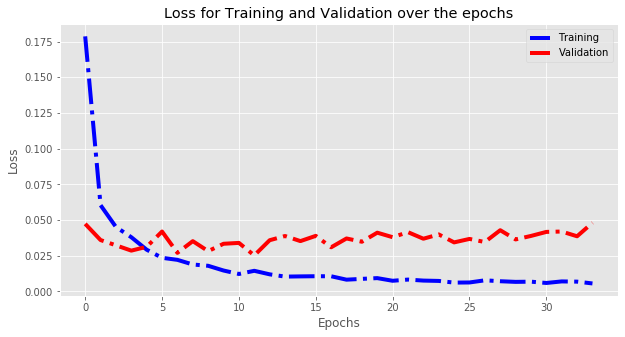

In [71]:
plt.figure(figsize=(10,5))
plt.plot(epochs,loss,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_loss,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Loss for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().spines["right"].set_visible(False)